In [2]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [3]:
total_bits = 2
total_combinations = 2 ** total_bits
s = 2 #10

Y = []

for a in range(total_combinations):
    y = s^a
    Y.append(y)
    print(f'a={a} - (s ⊕ a)={y}')

print('-'*20)

for y in Y:
    print(f'y={y} - (s ⊕ y)={y^s}')

a=0 - (s ⊕ a)=2
a=1 - (s ⊕ a)=3
a=2 - (s ⊕ a)=0
a=3 - (s ⊕ a)=1
--------------------
y=2 - (s ⊕ y)=0
y=3 - (s ⊕ y)=1
y=0 - (s ⊕ y)=2
y=1 - (s ⊕ y)=3


y = s⊕a\
y⊕s = s⊕a⊕s\
y⊕s = s⊕s⊕a\
y⊕s = 0⊕a\
y⊕s = a

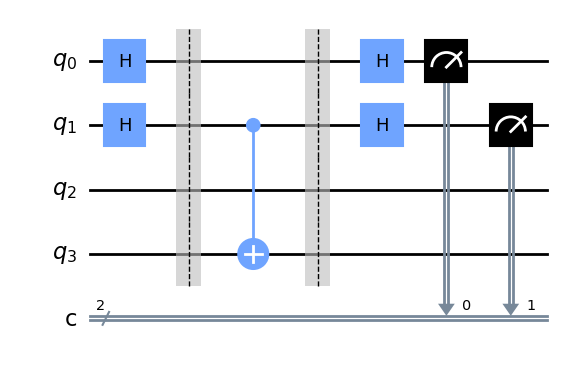

In [6]:
total_qubits = total_bits*2
half_qubits = total_bits

qc = QuantumCircuit(total_qubits, total_bits)
qc.h(range(half_qubits))
qc.barrier()
qc.cx(1, 3)
qc.barrier()
qc.h(range(half_qubits))
qc.measure(range(half_qubits), range(total_bits))
qc.draw('mpl', filename="simons.png")

In [7]:
sim = AerSimulator()
result = sim.run(qc).result().get_counts()
plot_histogram(result, filename="simons_plot.png")